/home/jaeseong/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


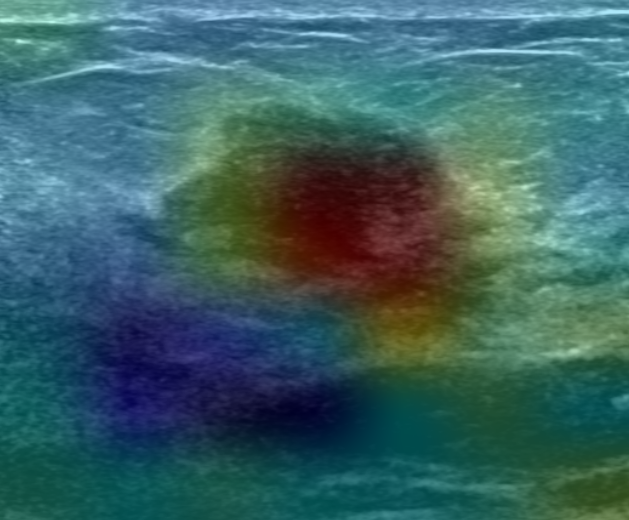

In [1]:
import cv2 
import torch
from torchvision import transforms
from PIL import Image

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((224,224)),
    transforms.ToTensor()])

img_path = "/home/jaeseong/DicomProject/server/TorchServe/FileSample/label_1/20110106_1467282_US_2_0022.png"
img = Image.open(img_path) # PIL 이미지 한 장 입력

model = torch.jit.load("model.jit.pt") # model load
output_dict = model(transform(img).unsqueeze(0))

prob = output_dict["prob"].item() # Malignancy 확률값
pred = output_dict["pred"].item() # 0: Non-malignancy, 1: Malignancy
pred = 'Malignancy' if pred else 'Non-malignancy'
cam = output_dict["cam"] # cam

if pred: # Non-malignancy의 경우 cam 반환하지 않음 
    heatmap = cv2.applyColorMap(cam.numpy(), cv2.COLORMAP_JET) # colormap 때문에 numpy 변환 후 post-processing
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGBA)
    heatmap = Image.fromarray(heatmap).resize(img.size)
    
    result = Image.blend(img.convert("RGBA"), heatmap, 0.3)
display(result)